In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sps

from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.colors as mcolors

from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [2]:
dataPath = "/home/anthe/documents/misu/paper_aerosols/absorption/datasets/"
figuresPath = "../figures/"

data_zonmean = xr.open_dataset(f'{dataPath}/historical-CR_single-plumes_3D_PRP_yearmean_zonmean.nc').squeeze()
data_vertmean = xr.open_dataset(f'{dataPath}/historical-CR_single-plumes_3D_PRP_yearmean_vertmean.nc').squeeze()

In [3]:
data_zonmean

<xarray.Dataset>
Dimensions:        (time: 164, bnds: 2, lat: 48, lev: 31, nhyi: 32, nhym: 31)
Coordinates:
  * time           (time) datetime64[ns] 1850-07-16T11:30:00 ... 2013-07-16T1...
    lon            float64 0.0
  * lat            (lat) float64 87.16 83.48 79.78 ... -79.78 -83.48 -87.16
  * lev            (lev) float64 1.0 2.0 3.0 4.0 5.0 ... 28.0 29.0 30.0 31.0
Dimensions without coordinates: bnds, nhyi, nhym
Data variables: (12/149)
    time_bnds      (time, bnds) datetime64[ns] ...
    hyai           (nhyi) float64 ...
    hybi           (nhyi) float64 ...
    hyam           (nhym) float64 ...
    hybm           (nhym) float64 ...
    dR_trad0       (time, lat) float32 ...
    ...             ...
    dQ_sp9_trad    (time, lev, lat) float32 ...
    dQ_sp9_srad    (time, lev, lat) float32 ...
    dQ_spd9_trad   (time, lev, lat) float32 ...
    dQ_spd9_srad   (time, lev, lat) float32 ...
    dQ_spi9_trad   (time, lev, lat) float32 ...
    dQ_spi9_srad   (time, lev, lat) float32 ...
Attributes: (12/18)
    CDI:               Climate Data Interface version 1.9.10 (https://mpimet....
    Conventions:       CF-1.4
    source:            ECHAM6.3
    institution:       Max-Planck-Institute for Meteorology
    title:             historical-CR_single-plumes_3D
    echam_version:     6.3.05
    ...                ...
    host_name:         n124
    jsbach_version:    3.20p1
    truncation:        31
    history:           Mon Jul 10 19:42:56 2023: cdo zonmean historical-CR_si...
    frequency:         year
    CDO:               Climate Data Operators version 1.9.10 (https://mpimet....

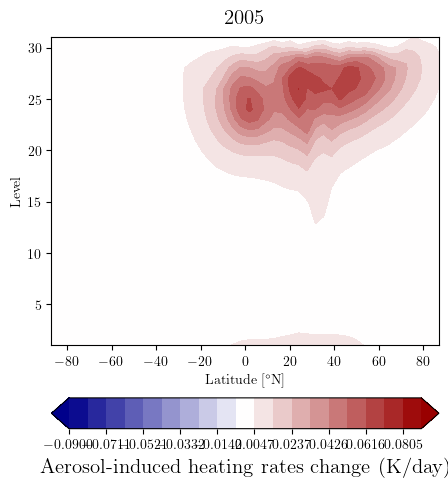

In [5]:
def plot(time):
    #print(data)
    %matplotlib inline

    fig, ax = plt.subplots(figsize=(5,4))
    cmap = mcolors.LinearSegmentedColormap.from_list('diverging_cmap', ['#00008B', '#FFFFFF', '#990000'])
    pc = ax.contourf(data_zonmean.lat, data_zonmean.lev, (data_zonmean.dQ_sp_sraf + data_zonmean.dQ_sp_traf).isel(time=time), levels= np.linspace(-0.09, 0.09, 20), cmap=cmap, extend='both')

    ax.set_ylabel('Level')

    axins = inset_axes(ax, width='100%', height='10%', loc="lower center", borderpad=-6)
    cb = plt.colorbar(pc, ax=ax, cax=axins, orientation='horizontal', pad=0.04)
    cb.set_label(label='Aerosol-induced heating rates change (K/day)', size=15, weight='bold')

    ax.set_xlabel(r'Latitude [$^{\circ}$N]')

    year = 1850 + time

    ax.set_title(str(year), pad = 10, fontsize=15)
    
    #plt.savefig(f'{figuresPath}/zonmean/absorption_zonmean_yearmean_{year}.png', bbox_inches='tight', dpi=400, transparent=True)
    #plt.close()

#for time in range((1850-1850), (2014-1850), 1):
plot(2005-1850)

0

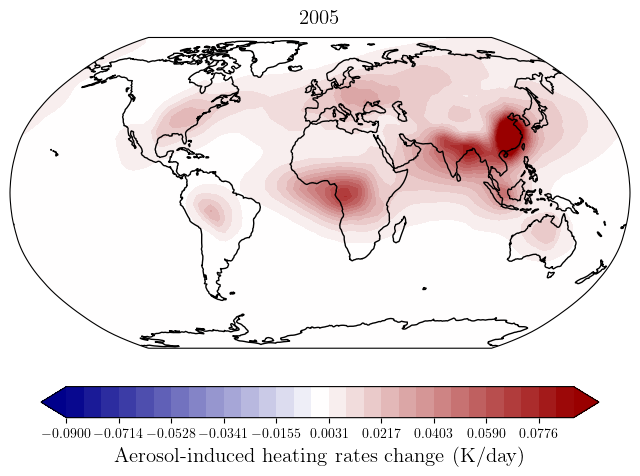

In [5]:
def plot(time):
    dataPath = "/home/anthe/documents/misu/paper_aerosols/absorption/datasets/"
    data_zonmean = xr.open_dataset(f'{dataPath}/historical-CR_single-plumes_3D_PRP_yearmean_zonmean.nc').squeeze()
    data_vertmean = xr.open_dataset(f'{dataPath}/historical-CR_single-plumes_3D_PRP_yearmean_vertmean.nc').squeeze()

    central_longitude = 0
    projectionStyle = ccrs.Robinson(central_longitude=central_longitude)

    fig, ax = plt.subplots(figsize=(8, 5), subplot_kw=dict(projection=projectionStyle)
    )


    var = (data_vertmean.dQ_sp_srad - data_vertmean.dQ_sp_trad).isel(time=time)
    lon = var.coords['lon']
    lon_idx = var.dims.index('lon')
    wrap_var, wrap_lon = add_cyclic_point(var.values, coord=lon, axis=lon_idx)

    cmap = mcolors.LinearSegmentedColormap.from_list('diverging_cmap', ['#00008B', '#FFFFFF', '#990000'])
    pc = ax.contourf(wrap_lon,
        var.lat,
        wrap_var,
        transform=ccrs.PlateCarree(),
        cmap=cmap,
        levels= np.linspace(-0.09, .09, 30), #np.linspace(Nmin, Nmax, 17),
        extend="both",
    )
    axins = inset_axes(ax, width='90%', height='10%', loc="lower center", borderpad= -5)

    cb = plt.colorbar(pc, cax=axins, ax=ax, orientation='horizontal', pad=0.04)
    cb.set_label(label='Aerosol-induced heating rates change (K/day)', size=15, weight='bold')

    ax.coastlines()

    year = 1850 + time

    ax.set_title(str(year), pad = 10, fontsize=15)
    
    #plt.savefig(f'{figuresPath}/maps/absorption_yearmean_{year}.png', bbox_inches='tight', dpi=400, transparent=True)
    #plt.close()

    return 0 
#for time in range((1850-1850), (2014-1850), 1):
plot(2005-1850)

0

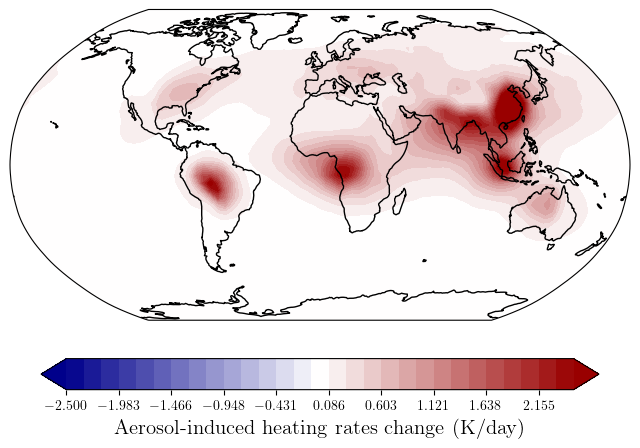

In [34]:
def plot(time):

    data_vertsum = xr.open_dataset(f'{dataPath}/historical-CR_single-plumes_3D_PRP_2005_monmean_vertsum.nc').squeeze()

    central_longitude = 0
    projectionStyle = ccrs.Robinson(central_longitude=central_longitude)

    fig, ax = plt.subplots(figsize=(8, 5), subplot_kw=dict(projection=projectionStyle)
    )


    var = (data_vertsum.dQ_sp_srad + data_vertsum.dQ_sp_trad).isel(time=time)
    lon = var.coords['lon']
    lon_idx = var.dims.index('lon')
    wrap_var, wrap_lon = add_cyclic_point(var.values, coord=lon, axis=lon_idx)

    cmap = mcolors.LinearSegmentedColormap.from_list('diverging_cmap', ['#00008B', '#FFFFFF', '#990000'])
    pc = ax.contourf(wrap_lon,
        var.lat,
        wrap_var,
        transform=ccrs.PlateCarree(),
        cmap=cmap,
        levels= np.linspace(-2.5, 2.5, 30), #np.linspace(Nmin, Nmax, 17),
        extend="both",
    )
    axins = inset_axes(ax, width='90%', height='10%', loc="lower center", borderpad= -5)

    cb = plt.colorbar(pc, cax=axins, ax=ax, orientation='horizontal', pad=0.04)
    cb.set_label(label='Aerosol-induced heating rates change (K/day)', size=15, weight='bold')

    ax.coastlines()

    #year = 1850 + time

    #ax.set_title(str(year), pad = 10, fontsize=15)
    
    #plt.savefig(f'{figuresPath}/maps/absorption_yearmean_{year}.png', bbox_inches='tight', dpi=400, transparent=True)
    #plt.close()

    return 0 
#for time in range((1850-1850), (2014-1850), 1):
plot(9)

In [25]:
data_vertmean = xr.open_dataset(f'{dataPath}/historical-CR_single-plumes_3D_PRP_2005_monmean_vertmean.nc').squeeze()
data_vertmean

<xarray.Dataset>
Dimensions:      (time: 12, lon: 96, lat: 48)
Coordinates:
  * time         (time) datetime64[ns] 2005-01-31T23:30:00 ... 2005-12-31T23:...
  * lon          (lon) float64 0.0 3.75 7.5 11.25 ... 345.0 348.8 352.5 356.2
  * lat          (lat) float64 87.16 83.48 79.78 76.07 ... -79.78 -83.48 -87.16
Data variables:
    dQ_sp_trad   (time, lat, lon) float32 ...
    dQ_sp_srad   (time, lat, lon) float32 ...
    dQ_spd_trad  (time, lat, lon) float32 ...
    dQ_spd_srad  (time, lat, lon) float32 ...
    dQ_spi_trad  (time, lat, lon) float32 ...
    dQ_spi_srad  (time, lat, lon) float32 ...
Attributes: (12/17)
    CDI:               Climate Data Interface version 2.0.4 (https://mpimet.m...
    Conventions:       CF-1.4
    source:            ECHAM6.3
    institution:       Max-Planck-Institute for Meteorology
    title:             historical-CR_single-plumes_3D
    echam_version:     6.3.05
    ...                ...
    user_name:         Antoine Hermant (x_anthe)
    host_name:         n663
    jsbach_version:    3.20p1
    truncation:        31
    history:           Thu Jul 13 15:59:59 2023: cdo vertmean historical-CR_s...
    CDO:               Climate Data Operators version 2.0.4 (https://mpimet.m...

In [10]:
dataPath = "/home/anthe/documents/misu/paper_aerosols/absorption/datasets/"
figuresPath = "../figures/"

data_zonmean = xr.open_dataset(f'{dataPath}/historical-CR_single-plumes_3D_PRP_yearmean_zonmean.nc').squeeze()
data_vertmean = xr.open_dataset(f'{dataPath}/historical-CR_single-plumes_3D_PRP_yearmean_vertmean.nc').squeeze()
data_zonmean

<xarray.Dataset>
Dimensions:        (time: 164, bnds: 2, lat: 48, lev: 31, nhyi: 32, nhym: 31)
Coordinates:
  * time           (time) datetime64[ns] 1850-07-16T11:30:00 ... 2013-07-16T1...
    lon            float64 0.0
  * lat            (lat) float64 87.16 83.48 79.78 ... -79.78 -83.48 -87.16
  * lev            (lev) float64 1.0 2.0 3.0 4.0 5.0 ... 28.0 29.0 30.0 31.0
Dimensions without coordinates: bnds, nhyi, nhym
Data variables: (12/149)
    time_bnds      (time, bnds) datetime64[ns] ...
    hyai           (nhyi) float64 ...
    hybi           (nhyi) float64 ...
    hyam           (nhym) float64 ...
    hybm           (nhym) float64 ...
    dR_trad0       (time, lat) float32 ...
    ...             ...
    dQ_sp9_trad    (time, lev, lat) float32 ...
    dQ_sp9_srad    (time, lev, lat) float32 ...
    dQ_spd9_trad   (time, lev, lat) float32 ...
    dQ_spd9_srad   (time, lev, lat) float32 ...
    dQ_spi9_trad   (time, lev, lat) float32 ...
    dQ_spi9_srad   (time, lev, lat) float32 ...
Attributes: (12/18)
    CDI:               Climate Data Interface version 1.9.10 (https://mpimet....
    Conventions:       CF-1.4
    source:            ECHAM6.3
    institution:       Max-Planck-Institute for Meteorology
    title:             historical-CR_single-plumes_3D
    echam_version:     6.3.05
    ...                ...
    host_name:         n124
    jsbach_version:    3.20p1
    truncation:        31
    history:           Mon Jul 10 19:42:56 2023: cdo zonmean historical-CR_si...
    frequency:         year
    CDO:               Climate Data Operators version 1.9.10 (https://mpimet....

interactive(children=(FloatSlider(value=0.0, description='time', max=164.0, step=1.0), Output()), _dom_classes…

<function __main__.plot(time)>

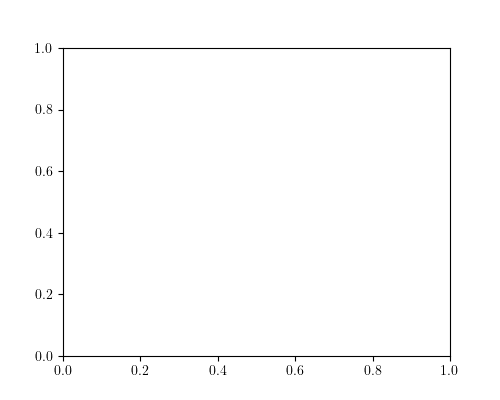

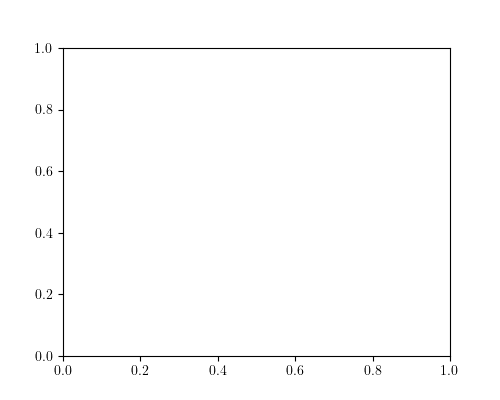

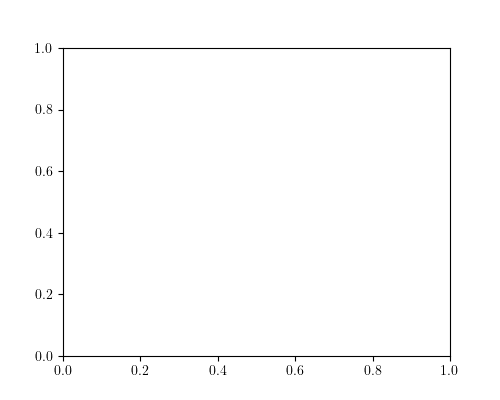

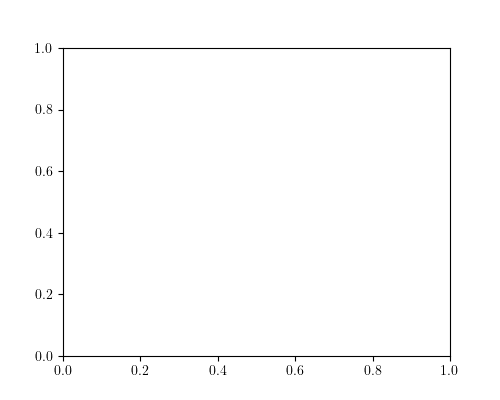

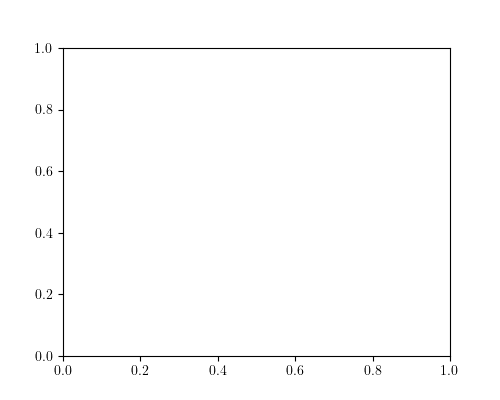

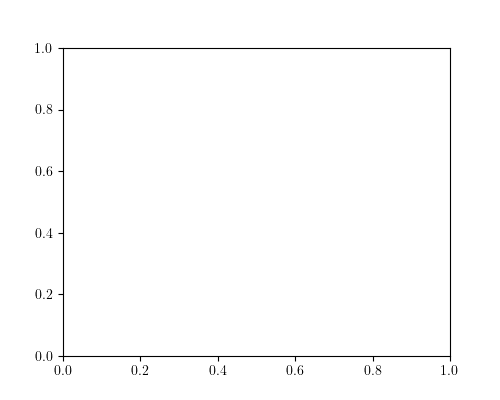

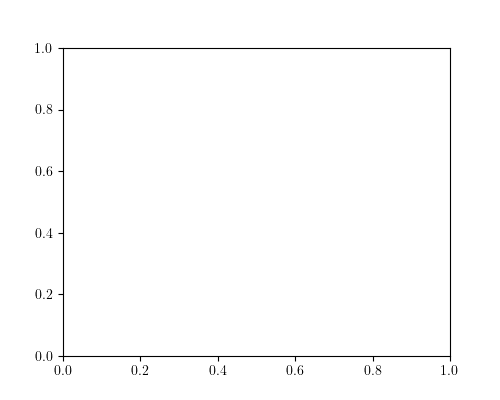

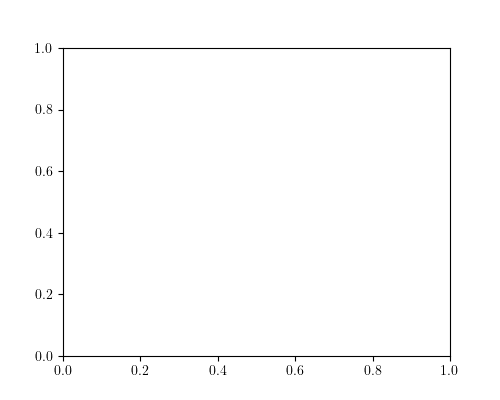

In [13]:
def plot(time):
    #print(data)

    %matplotlib widget

    fig, ax = plt.subplots(figsize=(5,4))
    cmap = mcolors.LinearSegmentedColormap.from_list('diverging_cmap', ['#00008B', '#FFFFFF', '#990000'])
    pc = ax.contourf(data_zonmean.lat, data_zonmean.lev, (data_zonmean.dQ_sp1_srad + data_zonmean.dQ_sp1_trad).isel(time=time), levels= np.linspace(-0.1, 0.1, 16), cmap=cmap)

    ax.set_ylabel('Level')

    axins = inset_axes(ax, width='90%', height='10%', loc="lower center", borderpad=-5)
    cb = plt.colorbar(pc, ax=ax, cax=axins, orientation='horizontal', pad=0.04)

    plt.xlabel(r'Latitude [$^{\circ}$N]')
    


    return 0

interact(plot, time=FloatSlider(min=0, max=164, step=1))

In [8]:
data_zonmean.time.values

array(['1850-07-16T11:30:00.000000000', '1851-07-16T11:30:00.000000000',
       '1852-07-16T11:30:00.000000000', '1853-07-16T11:30:00.000000000',
       '1854-07-16T11:30:00.000000000', '1855-07-16T11:30:00.000000000',
       '1856-07-16T11:30:00.000000000', '1857-07-16T11:30:00.000000000',
       '1858-07-16T11:30:00.000000000', '1859-07-16T11:30:00.000000000',
       '1860-07-16T11:30:00.000000000', '1861-07-16T11:30:00.000000000',
       '1862-07-16T11:30:00.000000000', '1863-07-16T11:30:00.000000000',
       '1864-07-16T11:30:00.000000000', '1865-07-16T11:30:00.000000000',
       '1866-07-16T11:30:00.000000000', '1867-07-16T11:30:00.000000000',
       '1868-07-16T11:30:00.000000000', '1869-07-16T11:30:00.000000000',
       '1870-07-16T11:30:00.000000000', '1871-07-16T11:30:00.000000000',
       '1872-07-16T11:30:00.000000000', '1873-07-16T11:30:00.000000000',
       '1874-07-16T11:30:00.000000000', '1875-07-16T11:30:00.000000000',
       '1876-07-16T11:30:00.000000000', '1877-07-16